# Heart Disease Diagnosis - Using Decision Tree

    To predict whether a patient has heart disease using clinical attributes and a Decision Tree Classifier, providing an interpretable, rule-based medical diagnosis model.
    
    This project aims to build a Decision Tree–based classification model that predicts the presence of heart disease using clinical diagnostic attributes.

## Project Scope 
    Dataset loading and preprocessing 
    Categorical feature encoding
    Feature-target separation and train-test split
    Decision Tree model traning and prediction 
    Model evaluation using Accuracy, Confusion Matrix, Precision, Recall, and F1-Score
    ROC-AUC analysis
    Decision Tree Visualization 

In [1]:
import pandas as pd                 # Data Handling
import matplotlib.pyplot as plt     # Visualization

from sklearn.model_selection import train_test_split               # Data spliting 
from sklearn.preprocessing import LabelEncoder                     # Encoding Categorical data
from sklearn.tree import DecisionTreeClassifier , plot_tree        # Model & Visuallization
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report #Evaluation

df= pd.read_csv("heart.csv")    # Load Loan Dataset 
print("Dataset Loaded Sucessfully")
print(df.head())                          # Display first row



Dataset Loaded Sucessfully
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


## Data Preprocessing

In [2]:
# Check for missing values
print(df.isnull().sum())         # Remove missing values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [3]:
# Encode categorical columns if needed
encoder = LabelEncoder()                     #Initialization label Encoder
for col in df.columns:                       # Loops through each column 
    if df[col].dtype == "object":            # Check for categorical data
        df[col] = le.fit_transform(df[col])  # convert text to numeric

## Spliting Features and Target 

In [4]:
#  Split Features and Target
X = df.drop("target", axis=1)   # Input features
y = df["target"]                # Output label


## Train - Test Spit

In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Traning -Decision Tree Model

In [6]:
model = DecisionTreeClassifier(
    criterion="gini",    # Decides how to split the data
    max_depth=5,          # Controls how deep the tree can grow | Control tree depth 
    random_state=42
);

In [7]:
#  Train Model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
# Make Predictions
y_pred = model.predict(X_test)

In [9]:
# Model Evaluation
print("\nAccuracy : ", accuracy_score(y_test, y_pred));   # Overall accuracy 
print("\nConfusion Matrix:\n ", confusion_matrix(y_test, y_pred));  #   Prediciton summary 
print("\nClassifiction Report:\n ", classification_report(y_test, y_pred));   # Details Metricsb


Accuracy :  0.8439024390243902

Confusion Matrix:
  [[75 27]
 [ 5 98]]

Classifiction Report:
                precision    recall  f1-score   support

           0       0.94      0.74      0.82       102
           1       0.78      0.95      0.86       103

    accuracy                           0.84       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.86      0.84      0.84       205



### Classification Report 
    Class 0 – No Heart Disease
    Precision: 0.94 → When model says “No Disease”, 94% times it is correct 
    Recall: 0.74 → 74% healthy patients correctly identified
    F1-score: 0.82
    
    Class 1 – Heart Disease
    Precision: 0.78 → Disease predict 78% accuracy
    Recall: 0.95 → 95% actual disease cases correctly detected
    F1-score: 0.86

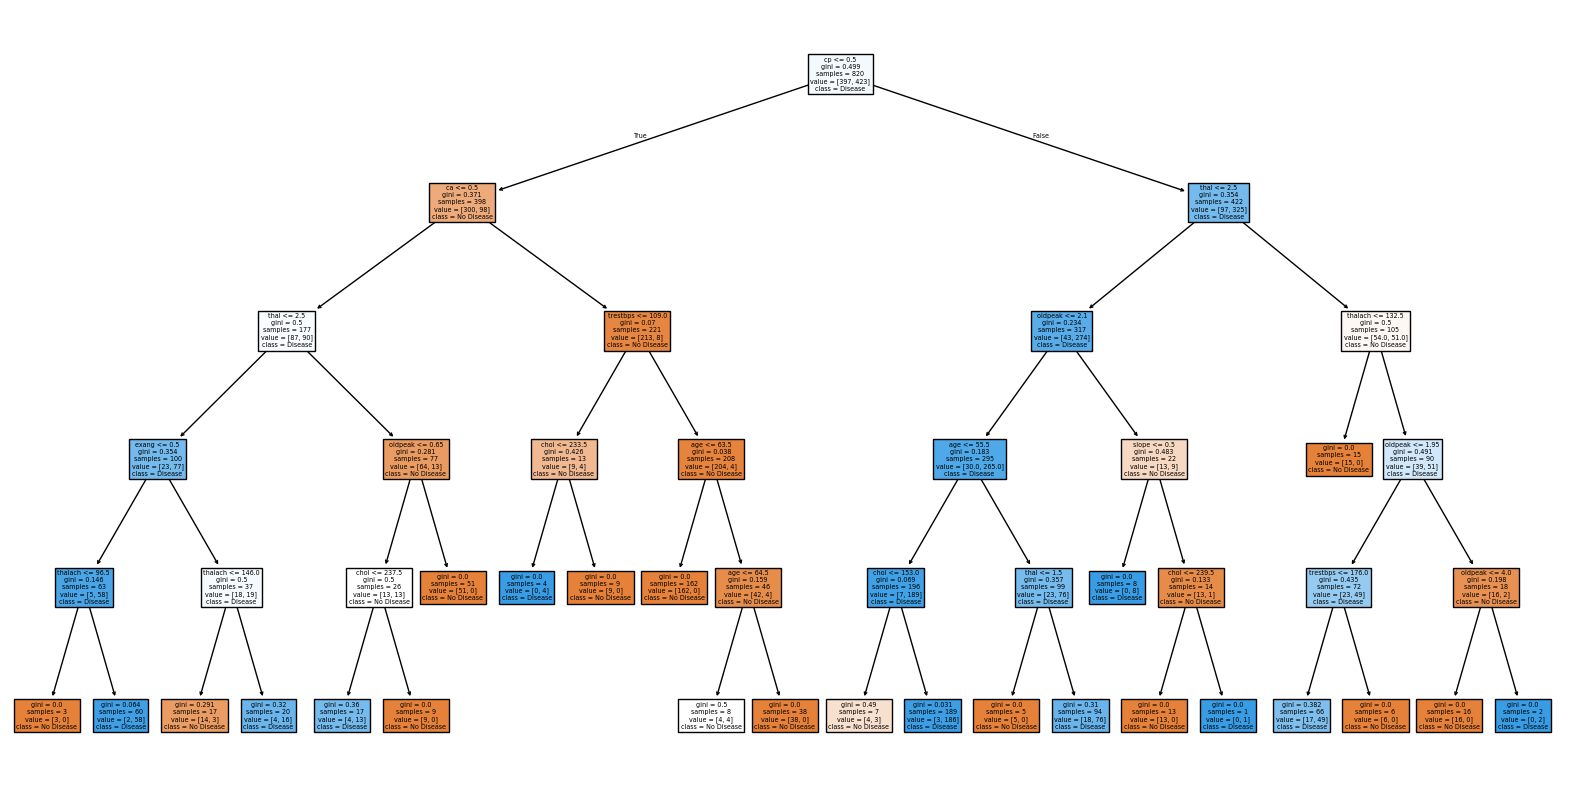

In [10]:
# 10. Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True
)
plt.show()


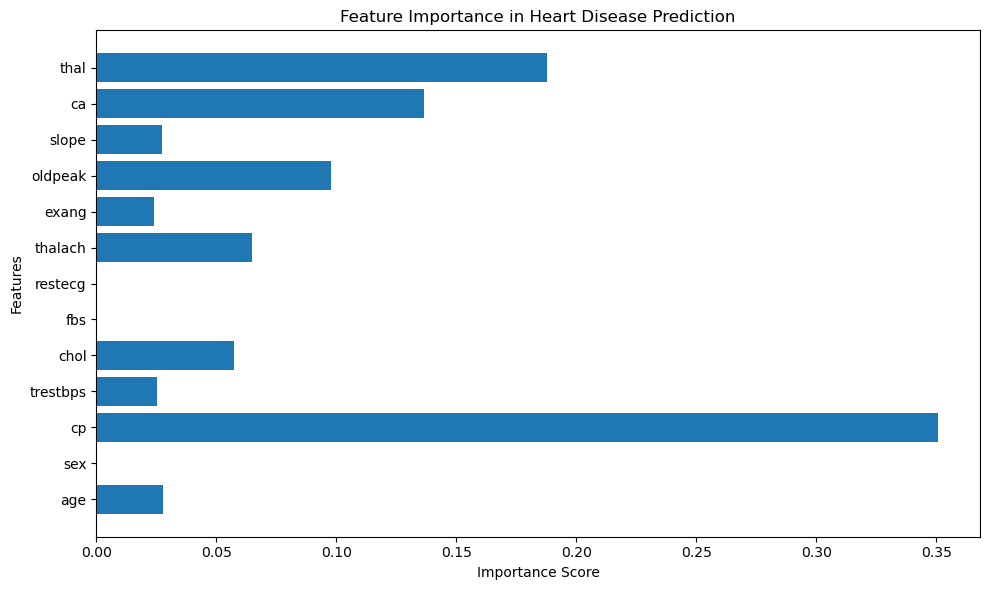

In [11]:
# Feature Importance Plot
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Heart Disease Prediction")
plt.tight_layout()
plt.show()


In [14]:
print("\n Please Enter Patient Medical Details (with Valid Ranges)\n")

age = int(input("Age (years) [18 – 100]: "))

sex = int(input(
    "Sex:\n"
    " 1 → Male\n"
    " 0 → Female\n"
    "Allowed: 0 or 1\n"
    "Enter value: "
))

cp = int(input(
    "Chest Pain Type (cp):\n"
    " 0 → Typical Angina\n"
    " 1 → Atypical Angina\n"
    " 2 → Non-anginal Pain\n"
    " 3 → Asymptomatic\n"
    "Allowed range: 0 – 3\n"
    "Enter value: "
))

trestbps = int(input(
    "Resting Blood Pressure (mm Hg)\n"
    "Normal range: 90 – 200\n"
    "Enter value: "
))

chol = int(input(
    "Serum Cholesterol (mg/dl)\n"
    "Typical range: 100 – 600\n"
    "Enter value: "
))

fbs = int(input(
    "Fasting Blood Sugar > 120 mg/dl (fbs):\n"
    " 1 → Yes\n"
    " 0 → No\n"
    "Allowed: 0 or 1\n"
    "Enter value: "
))

restecg = int(input(
    "Resting ECG Result (restecg):\n"
    " 0 → Normal\n"
    " 1 → ST-T Wave Abnormality\n"
    " 2 → Left Ventricular Hypertrophy\n"
    "Allowed range: 0 – 2\n"
    "Enter value: "
))

thalach = int(input(
    "Maximum Heart Rate Achieved (thalach)\n"
    "Typical range: 70 – 220\n"
    "Enter value: "
))

exang = int(input(
    "Exercise Induced Angina (exang):\n"
    " 1 → Yes\n"
    " 0 → No\n"
    "Allowed: 0 or 1\n"
    "Enter value: "
))

oldpeak = float(input(
    "Oldpeak (ST depression during exercise)\n"
    "Typical range: 0.0 – 6.0\n"
    "Enter value: "
))

slope = int(input(
    "Slope of Peak Exercise ST Segment (slope):\n"
    " 0 → Upsloping\n"
    " 1 → Flat\n"
    " 2 → Downsloping\n"
    "Allowed range: 0 – 2\n"
    "Enter value: "
))

ca = int(input(
    "Number of Major Vessels Colored by Fluoroscopy (ca)\n"
    "Allowed range: 0 – 4\n"
    "Enter value: "
))

thal = int(input(
    "Thalassemia (thal):\n"
    " 0 → Normal\n"
    " 1 → Fixed Defect\n"
    " 2 → Reversible Defect\n"
    "Allowed range: 0 – 2\n"
    "Enter value: "
))

# Create DataFrame
user_data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs,
                           restecg, thalach, exang, oldpeak,
                           slope, ca, thal]],
                         columns=X.columns)

# Prediction
prediction = model.predict(user_data)[0]

print("\n  Prediction Result:")
if prediction == 1:
    print("⚠️ Heart Disease Detected")
else:
    print("✅ No Heart Disease Detected")



 Please Enter Patient Medical Details (with Valid Ranges)



Age (years) [18 – 100]:  23
Sex:
 1 → Male
 0 → Female
Allowed: 0 or 1
Enter value:  1
Chest Pain Type (cp):
 0 → Typical Angina
 1 → Atypical Angina
 2 → Non-anginal Pain
 3 → Asymptomatic
Allowed range: 0 – 3
Enter value:  3
Resting Blood Pressure (mm Hg)
Normal range: 90 – 200
Enter value:  100
Serum Cholesterol (mg/dl)
Typical range: 100 – 600
Enter value:  350
Fasting Blood Sugar > 120 mg/dl (fbs):
 1 → Yes
 0 → No
Allowed: 0 or 1
Enter value:  1
Resting ECG Result (restecg):
 0 → Normal
 1 → ST-T Wave Abnormality
 2 → Left Ventricular Hypertrophy
Allowed range: 0 – 2
Enter value:  2
Maximum Heart Rate Achieved (thalach)
Typical range: 70 – 220
Enter value:  201
Exercise Induced Angina (exang):
 1 → Yes
 0 → No
Allowed: 0 or 1
Enter value:  1
Oldpeak (ST depression during exercise)
Typical range: 0.0 – 6.0
Enter value:  0.4
Slope of Peak Exercise ST Segment (slope):
 0 → Upsloping
 1 → Flat
 2 → Downsloping
Allowed range: 0 – 2
Enter value:  2
Number of Major Vessels Colored by Fl


  Prediction Result:
⚠️ Heart Disease Detected
